In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import time
import statistics

In [2]:
df = pd.read_csv('gemeenten.csv').set_index('GM_CODE')
df = df[['AANT_INW','P_00_14_JR','P_15_24_JR','P_25_44_JR','P_45_64_JR','P_65_EO_JR',]]

In [3]:
df.head(10)
df['gem_inw'] = df['AANT_INW'].mean()

In [4]:
def disaggregate_pop_to_EV(pop, df_agg):
    return round((df_agg / df_agg.sum()) * pop)

def aggregation(df_disagg,df_agg_pop,pop):    
    return round((df_disagg / pop) * df_agg_pop)

def thrashing_test(pop,df,column,thrash_iterations,name,plot=False):
    start = time.time()
    df_iteration = pd.DataFrame()
    df_iteration = df.copy()
    value_progression = []
    
    print(df[column]['GM0363'])
    for i in range(thrash_iterations):
        first_value = df[column]['GM0363']
    
        disagg = disaggregate_pop_to_EV(pop, df[column])
        agg = aggregation(disagg,df[column].sum(),pop)
        
        df_iteration[column] = agg 
        
        value_progression.append(df_iteration[column]['GM0363'])
        
        #if i%50 == 0 and i != 0:
        #    print('iteration {} complete'.format(i))
    
    end = time.time()
    
    print('Thrashing test took {} seconds, {} seconds per A/D round'.format(round(end - start,3),round((end-start)/thrash_iterations,3))) 
    Mean = round(statistics.mean(value_progression),3)
    
    if plot == True:
        plt.plot(value_progression,label = 'thrashed value')
        plt.hlines(y = value_progression[0], xmin = 0, xmax = len(value_progression),color = 'red',label='original value')
        plt.hlines(y = Mean, xmin = 0, xmax = len(value_progression),\
                   color = 'green',label='thrashed value mean',alpha = 0.8,linestyle=':')
        
        plt.title('{} space disaggregation thrashing test'.format(name))
        #plt.title('Change in one region population count during thrashing')
        plt.ylabel('Population (persons)')
        plt.xlabel('Performed A/D iterations')
        
        
        plt.legend(loc = 'upper right')
        plt.show()
    print('\n\n')
        
    return value_progression

873338
Thrashing test took 0.127 seconds, 0.001 seconds per A/D round


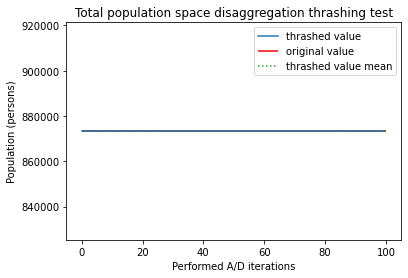




49646.06534090909
Thrashing test took 0.108 seconds, 0.001 seconds per A/D round


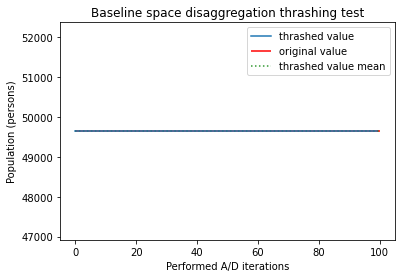




24
Thrashing test took 0.102 seconds, 0.001 seconds per A/D round


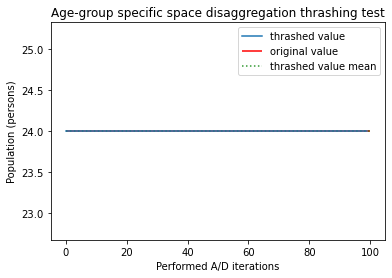

In [5]:
aant = thrashing_test(1000000,df,'AANT_INW',100,'Total population',plot=True)
gem = thrashing_test(1000000,df,'gem_inw',100,'Baseline',plot=True)
p45_64 = thrashing_test(1000000,df,'P_45_64_JR',100,'Age-group specific',plot=True)

In [6]:
dfnormal_run = pd.read_csv('SensitivityV2_scen2_rep1_evs1_price1.csv')
total_pop = pd.read_csv('aant_inw_original_scen1_rep1_evs0.9_price1.csv')
baseline = pd.read_csv('Baseline_original_scen1_rep1_evs0.9_price1.csv')
between45_64 = pd.read_csv('Between45-64_scen1_rep1_evs0.9_price1.csv')



def comparison(dforiginal,dfcompare,Start,Stop,label_name,compare_name):
    plt.figure(figsize=(15,5))
    start = Start
    stop = Stop
    x = np.linspace(0,stop-start,stop-start)
    plt.plot(x,dfcompare['total_current_power_demand'][start:stop],label='Power demand, {}-based'.format(label_name),alpha=0.9)
    plt.plot(x,dforiginal['total_current_power_demand'][start:stop],label='Power demand, original method',alpha=0.75,linestyle=':')
    plt.plot(x,dfcompare['total_VTG_capacity'][start:stop],label='VTG capacity, {}-based'.format(label_name),alpha=0.9)
    plt.plot(x,dforiginal['total_VTG_capacity'][start:stop],label='VTG capacity, original method',alpha=0.75,linestyle=':')
    plt.title("EVM KPI's behaviour comparison: {} spatial disagg method".format(compare_name))
    plt.ylabel('Electricity (KW)')
    plt.xlabel('Time (15 min)')
    plt.legend()
    plt.show()


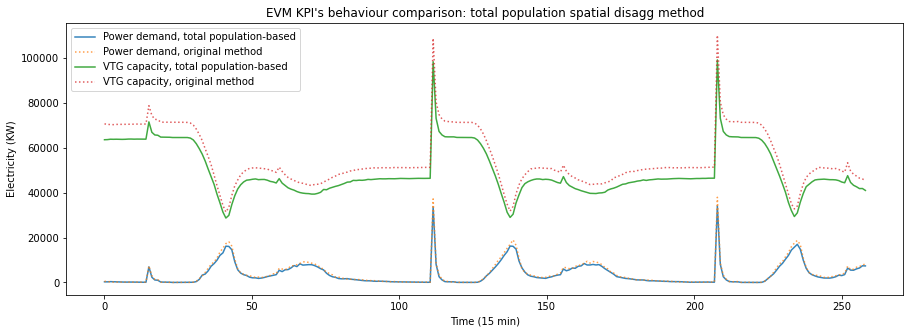

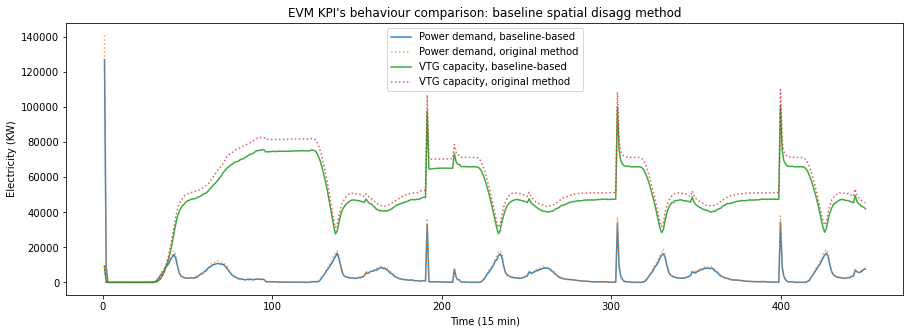

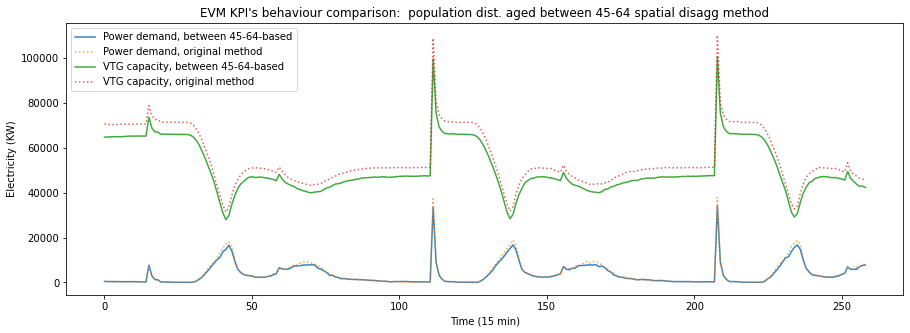

In [7]:
comparison(dfnormal_run,total_pop,192,450,'total population','total population')
comparison(dfnormal_run,baseline,0,450,'baseline','baseline')
comparison(dfnormal_run,between45_64,192,450,'between 45-64',' population dist. aged between 45-64')


In [8]:
df2 = pd.DataFrame()
df2['baseline'] = disaggregate_pop_to_EV(1000000, df['gem_inw'])
df2['aant_inw_original'] = disaggregate_pop_to_EV(1000000, df['AANT_INW'])
df2['between_45_64'] = disaggregate_pop_to_EV(1000000, df['P_45_64_JR'])
df2['AANT_INW'] = df['AANT_INW']



In [13]:
print(df2['baseline']['GM0363'])
print(df2['aant_inw_original']['GM0363'])
print(df2['between_45_64']['GM0363'])

2841.0
49975.0
2365.0


In [15]:
print(((2841.0) / 1000000)*100)
print(((49975.0) / 1000000)*100)
print(((2365.0) / 1000000)*100)

0.2841
4.9975
0.2365


In [ ]:
#df2.to_csv('population_disagg.csv')

## disagg methods
even accros all municipalities 

weigthed on pop 

weigthed on cars per municipality 

weigthed on pop and age 
